In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.covariance import ledoit_wolf
from scipy.spatial.distance import mahalanobis

%matplotlib inline

# Constantes

In [2]:
# Rutas de S3
S3_REFINED_URI = 's3://proyecto-integrador-20212-pregrado/datasets/refined/'

# Análisis exploratorio

In [3]:
# Cargar la matriz de precios y la matriz de retornos
df_prices = pd.read_parquet(f'{S3_REFINED_URI}matriz_precios.parquet')
df_returns = pd.read_parquet(f'{S3_REFINED_URI}matriz_retornos.parquet')

## Gráficas

In [4]:
# Función para graficar cada acción
def plot_stock_matrix(df, save_filepath, num_rows=20, num_cols=5, figsize=(30,90)):
    # Número de acciones por gráfica
    stocks_per_plot = df.shape[1]//(num_rows*num_cols)+1
    # Subplots
    fig, ax = plt.subplots(num_rows, num_cols, figsize=figsize)
    # Contadores para la fila y la columna de las gráficas
    row, col = 0,0
    # Contador para el número de acciones por gráfica
    stock_count = 0
    for stock in df.columns:
        ax[row,col].plot(df[stock])
        stock_count += 1
        # Cambiar de gráfica si se llega al número de acciones por gráfica
        if stock_count == stocks_per_plot:
            stock_count = 0
            # Si la columna es la última, cambiar de fila
            if col == num_cols-1:
                col = 0
                row += 1
            else:
                col += 1
    
    plt.savefig(save_filepath)

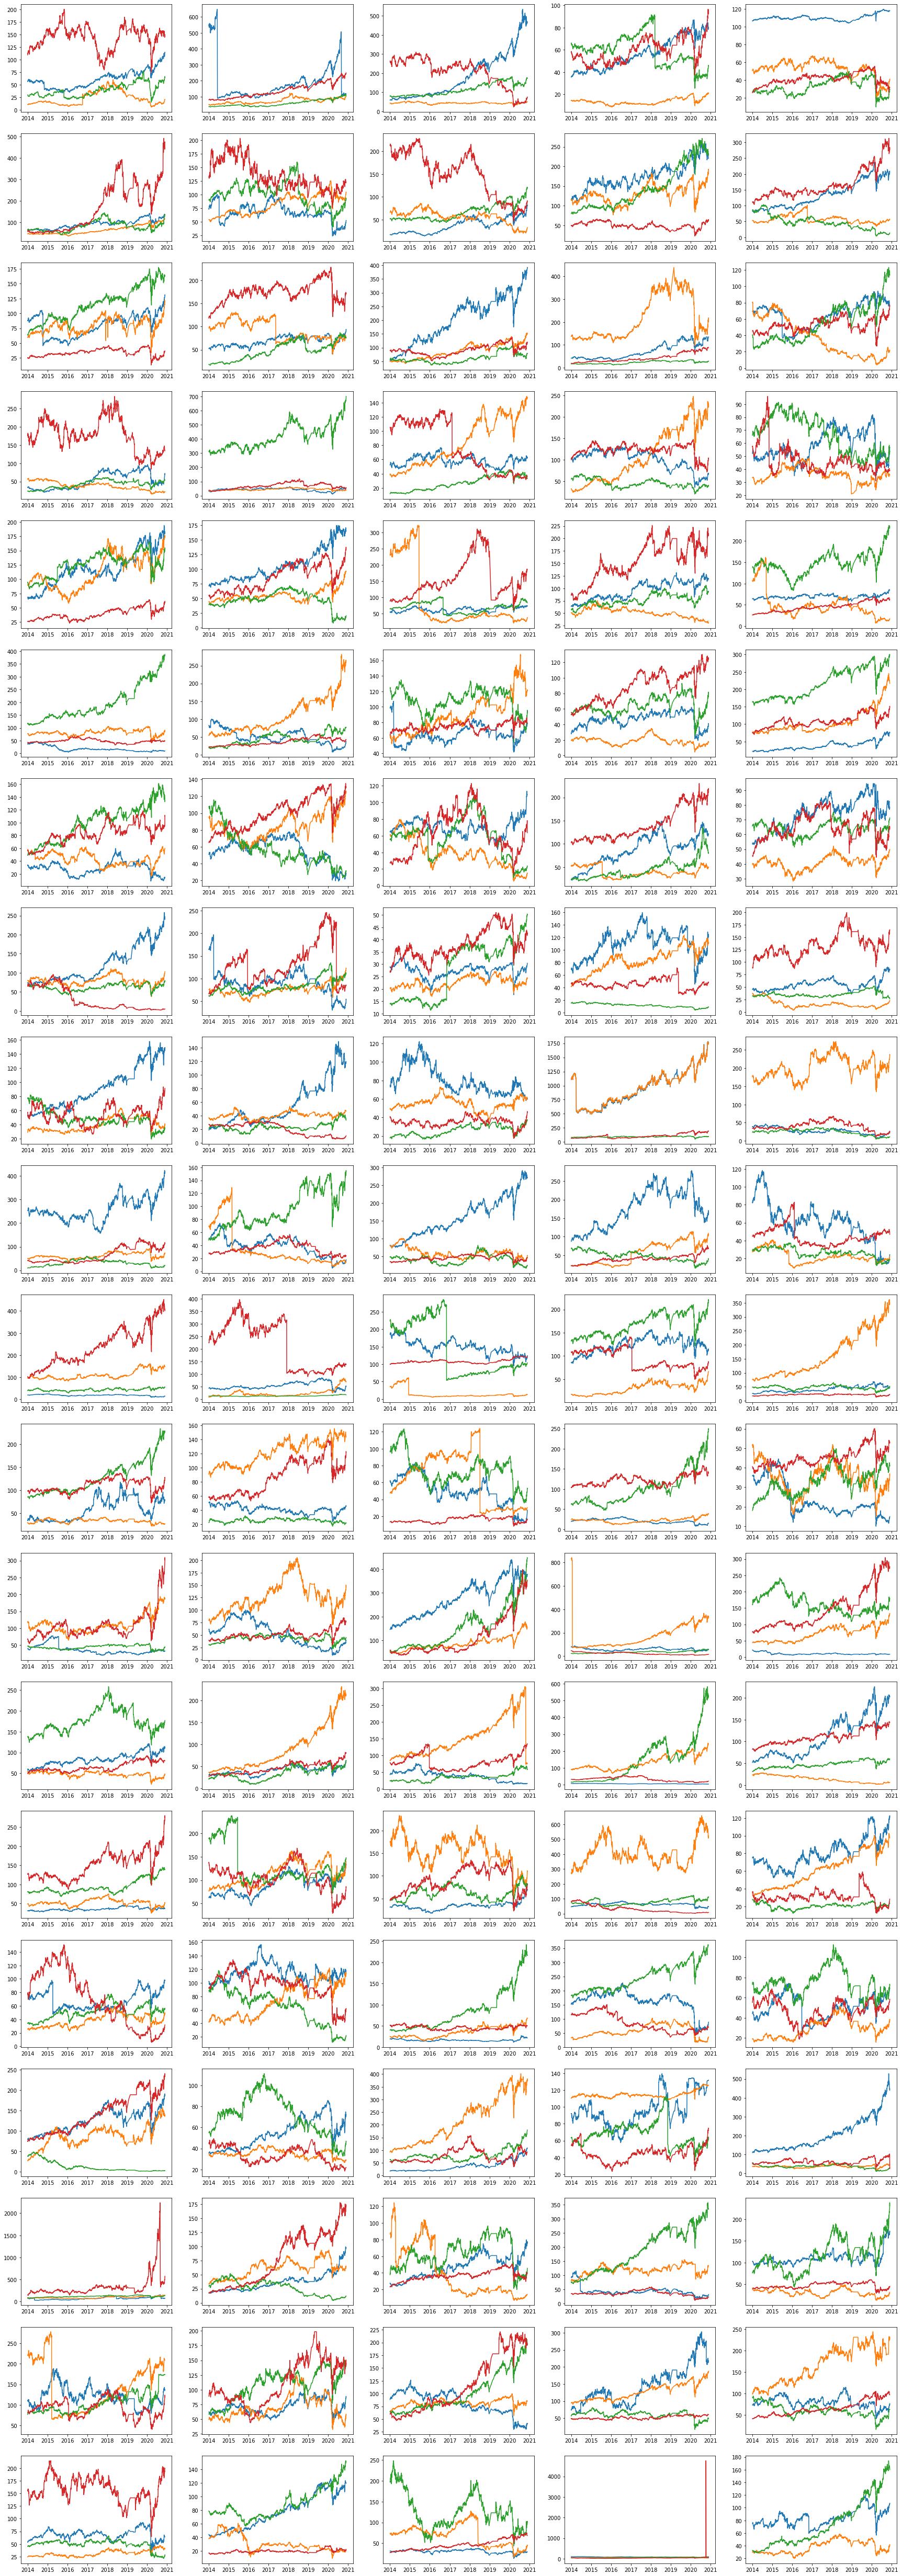

In [5]:
plot_stock_matrix(df_prices, 'stock_prices_graphs.png')

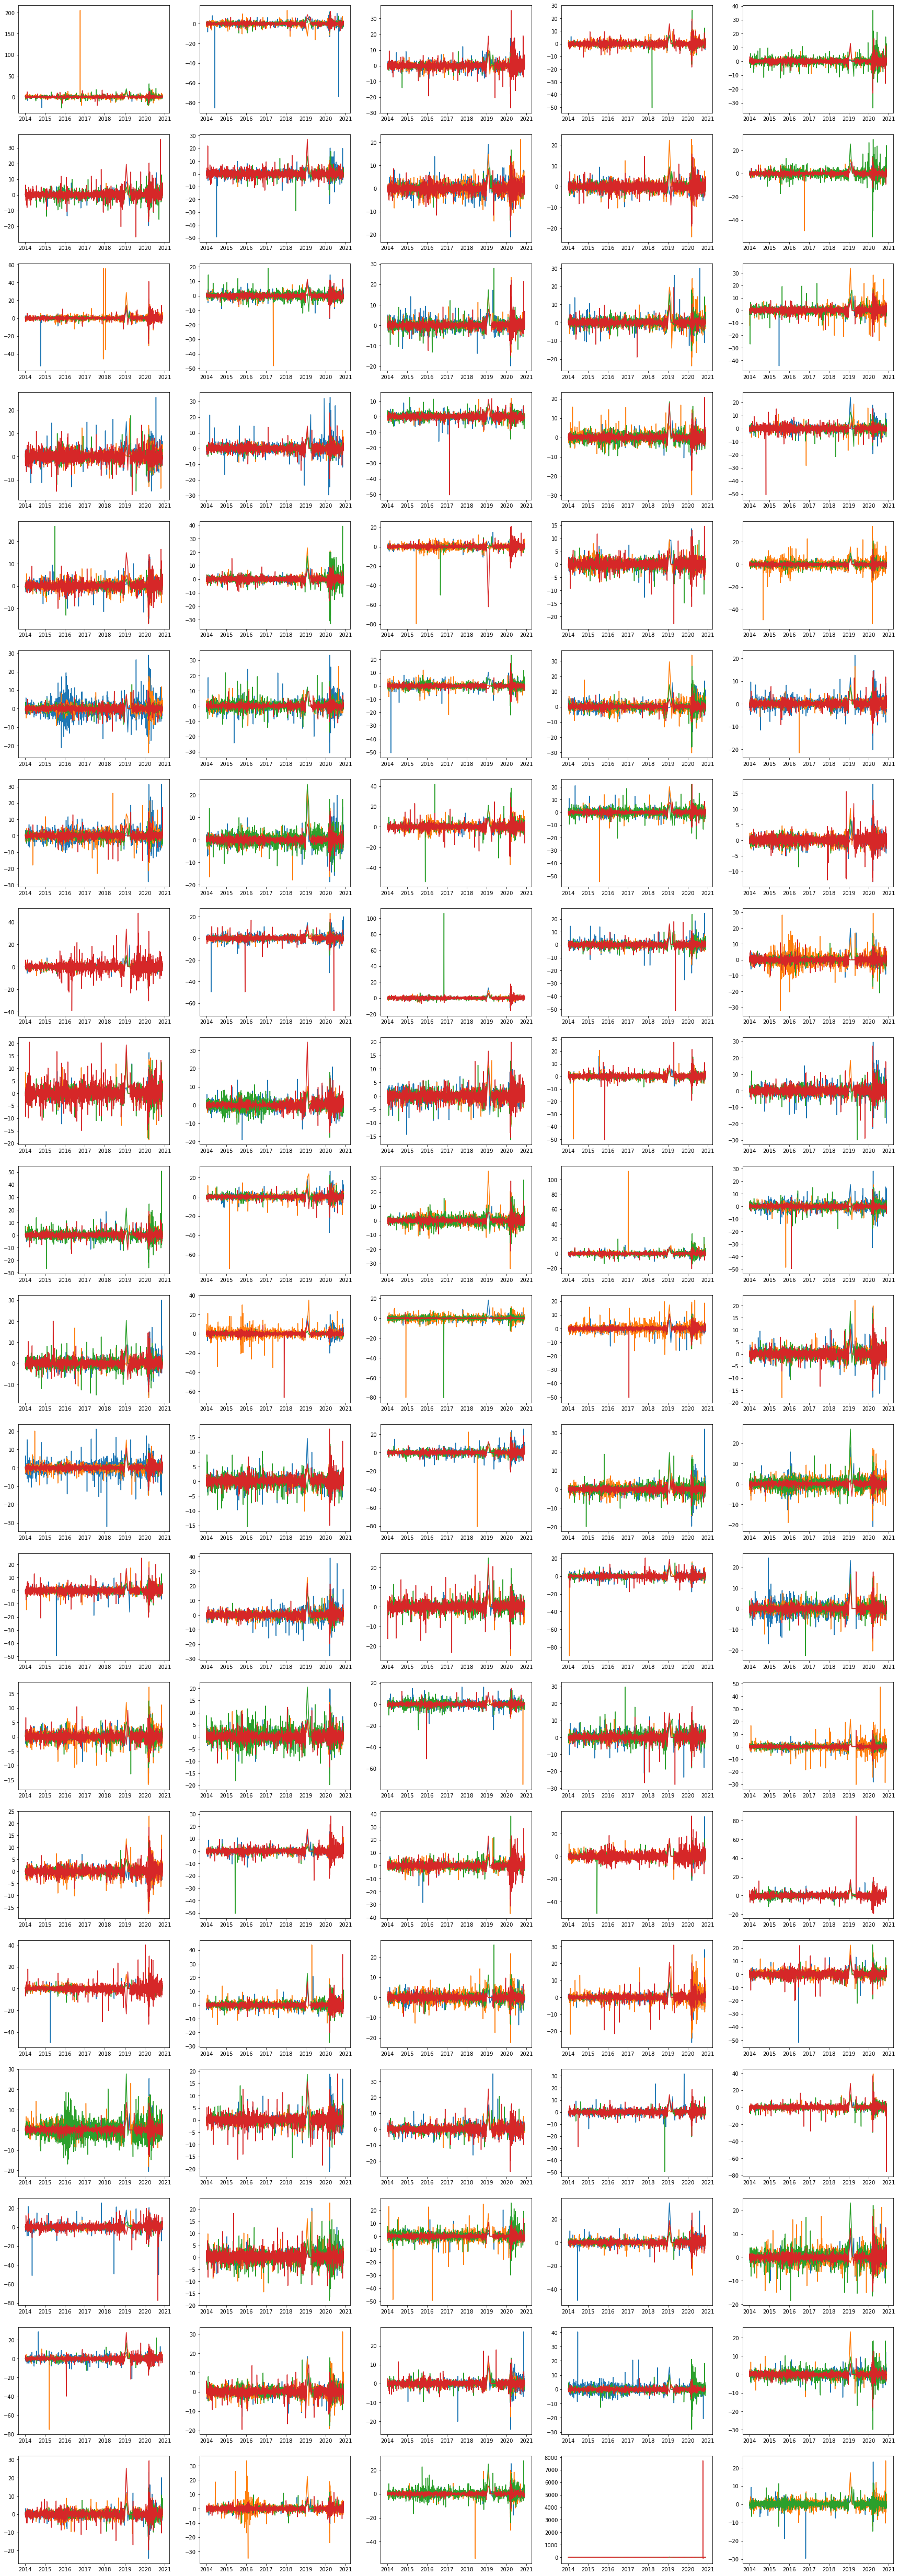

In [6]:
plot_stock_matrix(df_returns, 'stock_returns_graphs.png')

## Análisis descriptivo

In [7]:
# Función para crear una descripción estadística de los datos
def describe_data(df):
    description = df.describe()
    description.loc['curtosis'] = stats.kurtosis(df)
    description.loc['asimetría'] = stats.skew(df)
    
    return description

In [8]:
# Descripción de los precios
describe_data(df_prices)

A           AA          AAN          AAP         AAPL  \
count      1697.000000  1697.000000  1697.000000  1697.000000  1697.000000   
mean         60.094100    22.490010    38.279526   143.488486   192.487683   
std          17.335152    13.687654    12.629737    23.019817   121.678205   
min          33.480000     5.460000    15.010000    75.060000    90.330000   
25%          44.560000    11.480000    27.960000   127.710000   113.260000   
50%          58.570000    16.230000    35.660000   148.690000   151.750000   
75%          69.890000    32.950000    46.100000   159.270000   210.150000   
max         114.800000    60.210000    78.130000   200.320000   646.950000   
curtosis     -0.019015    -0.612143    -0.470446    -0.022744     3.181154   
asimetría     0.656335     0.833749     0.677873    -0.559235     1.956859   

                  ABBV          ABT          ACN         ADBE          ADM  \
count      1697.000000  1697.000000  1697.000000  1697.000000  1697.000000   
mean         73.245016    58.075991   136.071426   180.105145    43.643210   
std          16.658990    20.166275    44.953291   119.238298     4.401848   
min          46.460000    35.720000    75.850000    57.720000    29.210000   
25%          60.350000    42.370000    97.750000    80.530000    41.010000   
50%          67.480000    48.670000   122.200000   130.020000    43.535000   
75%          88.730000    72.210000   167.670000   266.330000    46.490000   
max         123.040000   114.420000   249.960000   534.070000    53.700000   
curtosis     -0.719256    -0.260232    -0.758714     0.032360    -0.081840   
asimetría     0.561608     0.968673     0.553960     0.995818    -0.179259   

           ...         WYND         WYNN          XEL          XOM  \
count      ...  1697.000000  1697.000000  1697.000000  1697.000000   
mean       ...    69.802760   127.731806    45.725832    78.867260   
std        ...    25.024323    44.217830    12.056408    15.979623   
min        ...    16.820000    43.030000    27.340000    31.550000   
25%        ...    45.720000    94.180000    35.400000    75.290000   
50%        ...    73.290000   120.860000    43.790000    81.960000   
75%        ...    84.480000   156.980000    51.800000    87.810000   
max        ...   127.420000   248.030000    74.680000   104.380000   
curtosis   ...    -0.764525    -0.570046    -0.675507     1.394346   
asimetría  ...    -0.007147     0.534181     0.605000    -1.305071   

                  XRAY          XYL         YNDX          YUM         ZION  \
count      1697.000000  1697.000000  1697.000000  1697.000000  1697.000000   
mean         52.754726    55.956407    35.495961    83.055536    37.222318   
std           7.880790    17.938484   162.023225    12.614839     9.912812   
min          31.920000    31.110000    10.300000    56.550000    19.900000   
25%          46.560000    37.330000    20.360000    73.780000    28.770000   
50%          53.050000    51.810000    30.010000    81.360000    32.410000   
75%          59.450000    72.270000    36.520000    89.990000    45.460000   
max          68.580000    97.580000  4762.200000   119.280000    58.550000   
curtosis     -0.751892    -1.394034   834.617866     0.102799    -1.250699   
asimetría    -0.305598     0.232649    28.846967     0.711982     0.374650   

                   ZTS  
count      1697.000000  
mean         73.289462  
std          37.688977  
min          28.400000  
25%          45.585000  
50%          55.140000  
75%          92.790000  
max         174.250000  
curtosis     -0.375380  
asimetría     0.889765  

[10 rows x 399 columns]

In [9]:
# Descripción de los retornos
describe_data(df_returns)

A           AA          AAN          AAP         AAPL  \
count      1696.000000  1696.000000  1696.000000  1696.000000  1696.000000   
mean          0.057611     0.141728     0.088590     0.041351     0.023894   
std           1.745690     5.863257     2.911170     2.126219     3.287784   
min         -26.126289   -21.162579   -26.497765   -20.400512   -85.490093   
25%          -0.648030    -1.434128    -1.063314    -0.800036    -0.639291   
50%           0.092092     0.000000     0.033812     0.010158     0.039814   
75%           0.883045     1.433739     1.201138     0.918218     0.958899   
max          12.913760   205.576923    31.186869    16.245136    11.999033   
curtosis     35.171290   887.644927    21.689117    18.037989   421.444439   
asimetría    -2.106306    25.363199     0.420966    -0.207564   -17.148470   

                  ABBV          ABT          ACN         ADBE          ADM  \
count      1696.000000  1696.000000  1696.000000  1696.000000  1696.000000   
mean          0.058097     0.071777     0.077398     0.140788     0.022963   
std           1.827630     1.503294     1.502552     1.934598     1.636274   
min         -16.377772    -9.714391    -8.377875   -14.516129   -10.136869   
25%          -0.735291    -0.576789    -0.521617    -0.644346    -0.689250   
50%           0.062948     0.038095     0.109614     0.151023     0.067245   
75%           0.879685     0.828059     0.729395     1.024482     0.785864   
max          13.610342    11.027888    12.737342    17.471623    10.681274   
curtosis     11.294081     8.588399    10.094359    10.037600     6.980170   
asimetría    -0.685569    -0.196118     0.340787     0.368126    -0.197243   

           ...         WYND         WYNN          XEL          XOM  \
count      ...  1696.000000  1696.000000  1696.000000  1696.000000   
mean       ...     0.017865     0.014544     0.062384    -0.044023   
std        ...     2.887809     3.323169     1.338626     1.672780   
min        ...   -54.149760   -24.347826   -12.716936   -12.160319   
25%        ...    -0.770312    -1.444650    -0.516628    -0.733927   
50%        ...     0.013563    -0.055497     0.060926    -0.029820   
75%        ...     0.867401     1.316193     0.686064     0.664325   
max        ...    19.765240    27.718816    11.312993    12.931854   
curtosis   ...    90.052426    11.367998    17.012265    11.557603   
asimetría  ...    -3.980059     0.725277    -0.457734     0.194934   

                  XRAY          XYL         YNDX          YUM         ZION  \
count      1696.000000  1696.000000  1696.000000  1696.000000  1696.000000   
mean          0.020019     0.072583     4.557727     0.037555     0.041342   
std           1.786850     1.683018   187.674302     1.806600     2.120367   
min         -18.662056   -11.484364   -98.694638   -29.682429   -12.032313   
25%          -0.716829    -0.660042    -1.317057    -0.563467    -1.001960   
50%           0.050952     0.026792     0.032543     0.050902     0.022010   
75%           0.773899     0.885748     1.508997     0.684289     1.079552   
max          20.171674    11.385375  7727.416174    23.253758    23.849765   
curtosis     23.857981     8.476081  1689.698129    68.902999    14.574802   
asimetría     0.399108     0.124539    41.122245    -2.162022     0.996651   

                   ZTS  
count      1696.000000  
mean          0.107727  
std           1.631549  
min         -14.770284  
25%          -0.620489  
50%           0.100085  
75%           0.805187  
max          11.835723  
curtosis     12.737526  
asimetría     0.158468  

[10 rows x 399 columns]

## Regresiones y correlación

### Matriz de correlación

In [10]:
corr_matrix = df_returns.corr()
corr_matrix

A        AA       AAN       AAP      AAPL      ABBV       ABT  \
A     1.000000  0.188259  0.310139  0.282852  0.244015  0.363234  0.562131   
AA    0.188259  1.000000  0.191076  0.152662  0.110777  0.101330  0.154172   
AAN   0.310139  0.191076  1.000000  0.349887  0.178672  0.158262  0.311768   
AAP   0.282852  0.152662  0.349887  1.000000  0.154771  0.262139  0.339412   
AAPL  0.244015  0.110777  0.178672  0.154771  1.000000  0.172634  0.278288   
...        ...       ...       ...       ...       ...       ...       ...   
XYL   0.528934  0.249428  0.397872  0.376655  0.242886  0.325204  0.494040   
YNDX  0.008564  0.019049  0.011693  0.009464  0.001254  0.006835  0.015777   
YUM   0.354926  0.186138  0.383323  0.339803  0.214161  0.245620  0.369124   
ZION  0.430438  0.251259  0.394314  0.335754  0.189311  0.252924  0.345540   
ZTS   0.479717  0.127575  0.312494  0.336403  0.253628  0.410376  0.548908   

           ACN      ADBE       ADM  ...      WYND      WYNN       XEL  \
A     0.563489  0.521430  0.429874  ...  0.369764  0.357103  0.300857   
AA    0.208450  0.157803  0.213444  ...  0.221081  0.223095  0.090041   
AAN   0.379958  0.295552  0.365224  ...  0.403088  0.373282  0.246603   
AAP   0.376718  0.298948  0.360185  ...  0.320754  0.259206  0.324175   
AAPL  0.302409  0.317398  0.225197  ...  0.205523  0.207930  0.167079   
...        ...       ...       ...  ...       ...       ...       ...   
XYL   0.573496  0.447780  0.528258  ...  0.480980  0.416916  0.391664   
YNDX  0.019031 -0.001220  0.021029  ...  0.012342 -0.003483  0.011693   
YUM   0.454587  0.378791  0.317568  ...  0.340189  0.311377  0.326659   
ZION  0.472074  0.286710  0.521721  ...  0.511796  0.456098  0.175598   
ZTS   0.535115  0.476735  0.367075  ...  0.345310  0.311020  0.347871   

           XOM      XRAY       XYL      YNDX       YUM      ZION       ZTS  
A     0.425068  0.386023  0.528934  0.008564  0.354926  0.430438  0.479717  
AA    0.284453  0.176471  0.249428  0.019049  0.186138  0.251259  0.127575  
AAN   0.377974  0.382916  0.397872  0.011693  0.383323  0.394314  0.312494  
AAP   0.327713  0.293221  0.376655  0.009464  0.339803  0.335754  0.336403  
AAPL  0.238517  0.172575  0.242886  0.001254  0.214161  0.189311  0.253628  
...        ...       ...       ...       ...       ...       ...       ...  
XYL   0.556684  0.425278  1.000000  0.031905  0.434056  0.549636  0.450813  
YNDX  0.082556  0.035094  0.031905  1.000000  0.026091  0.005267  0.033034  
YUM   0.384698  0.327609  0.434056  0.026091  1.000000  0.351175  0.413573  
ZION  0.568742  0.463898  0.549636  0.005267  0.351175  1.000000  0.288749  
ZTS   0.373825  0.354564  0.450813  0.033034  0.413573  0.288749  1.000000  

[399 rows x 399 columns]

In [11]:
# Sacar la matriz triangular superior de la matriz de correlaciones para hacer análisis
upper_tri_corr = pd.DataFrame(np.triu(corr_matrix,1), index = df_returns.columns, columns=df_returns.columns)

In [12]:
# Hallar la acción con mayor y menor correlación a cada acción
max_corrs = upper_tri_corr.idxmax()[1:], upper_tri_corr.max()[1:]
min_corrs = upper_tri_corr.idxmin()[1:], upper_tri_corr.min()[1:]

In [13]:
max_min_corrs = pd.DataFrame()
max_min_corrs['Acción con máxima correlación'] = max_corrs[0]
max_min_corrs['Coeficiente de correlación máximo'] = max_corrs[1]
max_min_corrs['Acción con mínima correlación'] = min_corrs[0]
max_min_corrs['Coeficiente de correlación mínimo'] = min_corrs[1]

In [14]:
max_min_corrs.sort_values('Coeficiente de correlación máximo', ascending=False)

Acción con máxima correlación  Coeficiente de correlación máximo  \
VTI                             SPY                           0.992008   
SPY                             DIA                           0.970871   
IWN                             IJH                           0.956508   
GOOGL                          GOOG                           0.933488   
IJH                             DIA                           0.921494   
...                             ...                                ...   
KDP                             IJH                           0.261576   
AAPL                              A                           0.244015   
AA                                A                           0.188259   
AGG                             AES                           0.182168   
YNDX                            DTE                           0.105906   

      Acción con mínima correlación  Coeficiente de correlación mínimo  
VTI                             IEF                          -0.331665  
SPY                             IEF                          -0.342634  
IWN                             IEF                          -0.334154  
GOOGL                           AGG                          -0.007715  
IJH                             IEF                          -0.330763  
...                             ...                                ...  
KDP                             IEF                          -0.067199  
AAPL                           AAPL                           0.000000  
AA                               AA                           0.000000  
AGG                             ABT                          -0.100269  
YNDX                           AMGN                          -0.096135  

[398 rows x 4 columns]

In [15]:
max_min_corrs.sort_values('Coeficiente de correlación mínimo')

Acción con máxima correlación  Coeficiente de correlación máximo  \
IEF                            AGG                           0.690663   
SCHW                           BAC                           0.782771   
MET                            AMP                           0.824852   
JPM                            BAC                           0.910547   
ZION                           USB                           0.817203   
...                            ...                                ...   
DLX                              C                           0.617884   
DLTR                           DIA                           0.424936   
DLR                            CCI                           0.606968   
DY                             DIA                           0.523756   
AA                               A                           0.188259   

     Acción con mínima correlación  Coeficiente de correlación mínimo  
IEF                            BAC                          -0.467576  
SCHW                           IEF                          -0.464439  
MET                            IEF                          -0.440339  
JPM                            IEF                          -0.428117  
ZION                           IEF                          -0.426048  
...                            ...                                ...  
DLX                            DLX                           0.000000  
DLTR                          DLTR                           0.000000  
DLR                            DLR                           0.000000  
DY                              DY                           0.000000  
AA                              AA                           0.000000  

[398 rows x 4 columns]

### Regresión lineal de retornos para cada variable con las demás como explicativas

In [16]:
# Separar los datos en entrenamiento y validación (no puede ser aleatorio por ser serie de tiempo)
train_size = 0.8
test_size = 1 - train_size
# Último índice de entrenamiento
last_train_index = int(df_returns.shape[0]*train_size)

In [17]:
# Función para calcular el coeficiente de determinación para los retornos de una acción explicados por los de las demás
def calculate_r2(stock):
    # Matriz de variables independientes
    X = df_returns.drop(stock, axis = 1)
    # Vector con variable dependiente
    y = df_returns[stock]
    # Variables independientes de entrenamiento y validación
    X_train, X_test = X[:last_train_index], X[last_train_index:]
    # Variables dependientes de entrenamiento y validación
    y_train, y_test = y[:last_train_index], y[last_train_index:]
    # Modelo de regresión lineal
    lr = LinearRegression().fit(X_train, y_train)
    # Predicciones del modelo en entrenamiento
    train_prediction = lr.predict(X_train)
    # Predicciones del modelo en validación
    test_prediction = lr.predict(X_test)
    # Coeficiente de determinación en entrenamiento
    train_r2_score = r2_score(y_train, train_prediction)
    # Coeficiente de determinación en validación
    test_r2_score = r2_score(y_test, test_prediction)
    
    return train_r2_score, test_r2_score

# Función para calcular los coeficientes R2 de entrenamiento y validación para los retornos de todas las acciones
def calculate_r2_per_stock(df):
    stock_names = df.columns
    train_scores = np.zeros(df.shape[1])
    test_scores = np.zeros(df.shape[1])
    # Calcular los R2 para cada acción
    for i, stock in enumerate(stock_names):
        train_scores[i], test_scores[i] = calculate_r2(stock)
        
    ret = pd.DataFrame(index = stock_names)
    ret['R^2 entrenamiento'] = train_scores
    ret['R^2 validación'] = test_scores
    
    return ret

In [18]:
r2_per_stock = calculate_r2_per_stock(df_returns)

In [19]:
r2_per_stock

R^2 entrenamiento  R^2 validación
A              0.700765       -0.365976
AA             0.747238       -1.926449
AAN            0.538948       -3.197922
AAP            0.535828       -1.330629
AAPL           0.336271       -1.015025
...                 ...             ...
XYL            0.723119       -1.811530
YNDX           0.628700       -0.002583
YUM            0.584249       -8.760330
ZION           0.852976       -0.061708
ZTS            0.590995       -7.442490

[399 rows x 2 columns]

In [20]:
# Guardar los resultados de los R2 en S3
r2_per_stock.to_parquet(f'{S3_REFINED_URI}coeficientes_r2_por_acción.parquet')

## Análisis de la matriz de covarianzas

In [21]:
# Calcular la matriz de varianzas y covarianzas de Ledoit & Wolf
cov_matrix = np.cov(df_returns.T)
# Calcular la matriz de varianzas y covarianzas de Ledoit & Wolf
cov_matrix = np.cov(df_returns.T)

# Guardar la matriz de varianzas y covarianzas de Ledoit & Wolf en S3
cov_matrix = pd.DataFrame(cov_matrix, index = df_returns.columns, columns = df_returns.columns)
cov_matrix.to_parquet(f'{S3_REFINED_URI}cov_retornos.parquet')

# Calcular la matriz de varianzas y covarianzas de Ledoit & Wolf
cov_matrix_lw = ledoit_wolf(df_returns)[0]

# Guardar la matriz de varianzas y covarianzas de Ledoit & Wolf en S3
cov_matrix_lw = pd.DataFrame(cov_matrix_lw, index = df_returns.columns, columns = df_returns.columns)
cov_matrix_lw.to_parquet(f'{S3_REFINED_URI}cov_retornos_lw.parquet')
# Guardar la matriz de varianzas y covarianzas de Ledoit & Wolf en S3
cov_matrix = pd.DataFrame(cov_matrix, index = df_returns.columns, columns = df_returns.columns)
cov_matrix.to_parquet(f'{S3_REFINED_URI}cov_retornos.parquet')

In [22]:
# Calcular la matriz de varianzas y covarianzas de Ledoit & Wolf
cov_matrix_lw = ledoit_wolf(df_returns)[0]

# Guardar la matriz de varianzas y covarianzas de Ledoit & Wolf en S3
cov_matrix_lw = pd.DataFrame(cov_matrix_lw, index = df_returns.columns, columns = df_returns.columns)
cov_matrix_lw.to_parquet(f'{S3_REFINED_URI}cov_retornos_lw.parquet')

In [23]:
print(f'El determinante de la matriz de covarianzas habitual es {np.linalg.det(cov_matrix)}')
print(f'El determinante de la matriz de covarianzas con shrinkage de Ledoit & Wolf es {np.linalg.det(cov_matrix_lw)}')
print(f'El número condición de la matriz de covarianzas habitual es {np.linalg.cond(cov_matrix)}')
print(f'El número condición de la matriz de covarianzas con shrinkage de Ledoit & Wolf es {np.linalg.cond(cov_matrix_lw)}')

El determinante de la matriz de covarianzas habitual es 4.8236161316752686e+64
El determinante de la matriz de covarianzas con shrinkage de Ledoit & Wolf es inf
El número condición de la matriz de covarianzas habitual es 9092168.044344164
El número condición de la matriz de covarianzas con shrinkage de Ledoit & Wolf es 1.0572061506581245


C:\ProgramData\Anaconda3\lib\site-packages\numpy\linalg\linalg.py:2158: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)


A pesar de que en este caso el determinante de la matriz no es bajo, el número condición es muy alto, lo cual quiere decir que la matriz está muy mal condicionada, lo cual implica que es muy sensible a cambios en los valores.

## Identificación de outliers

Se hará una identificación de valores atípicos con base en la distancia de Mahalanobis de cada vector al vector de medias.

In [24]:
# Función para encontrar outliers
def find_outliers(df, cov=cov_matrix_lw, distance='mahalanobis'): 
    # Calcular el vector de medias respecto a los días
    mean_vector = df.mean()
    # Sacar un vector de distancias entre cada día y el vector de medias
    distances_to_mean = np.zeros(df.shape[0])
    for i, day in enumerate(df.T):
        if distance=='mahalanobis':
            distances_to_mean[i] = mahalanobis(mean_vector, df.iloc[i], np.linalg.pinv(cov))
        else:
            distances_to_mean[i] = np.linalg.norm(mean_vector - df.iloc[i], ord=distance)
    
    return distances_to_mean

In [25]:
# Función para graficar outliers
def plot_outliers(percentile, distances_to_mean, df, distance_name = 'Mahalanobis'):
    # Valor de distancia por encima del cual se considera un outlier
    percentile_value = np.percentile(distances_to_mean, percentile)

    #Sacar los outliers muy lejos de la media
    outliers = np.where(distances_to_mean > percentile_value)
    #Sacar los datos que no son outliers
    normal_data = np.where(distances_to_mean <= percentile_value)

    fig, ax = plt.subplots(figsize=(10,10))

    ax.scatter(normal_data, distances_to_mean[normal_data], s=2);
    ax.scatter(outliers, distances_to_mean[outliers], color='r', s=2);

    ax.set_title(f'Distancia entre cada día y el día medio con {distance_name}')
    ax.set_xlabel('Fecha')
    ax.set_ylabel('Distancia');

    plt.savefig(f'Oultiers_{distance_name}.png')
    
    print(f'Los días más atípicos fueron: {df.iloc[outliers].index.format()}')

Los días más atípicos fueron: ['2014-01-22', '2014-02-03', '2014-04-03', '2014-05-08', '2014-06-09', '2014-10-10', '2014-11-03', '2014-12-09', '2015-03-04', '2015-03-19', '2015-06-18', '2015-07-01', '2015-07-27', '2015-08-24', '2015-08-27', '2015-09-01', '2015-09-28', '2015-10-22', '2015-10-23', '2015-11-02', '2015-11-03', '2015-11-30', '2015-12-14', '2016-01-07', '2016-01-13', '2016-01-22', '2016-01-25', '2016-01-28', '2016-01-29', '2016-02-02', '2016-02-05', '2016-02-08', '2016-02-10', '2016-02-12', '2016-03-08', '2016-04-08', '2016-06-24', '2016-06-27', '2016-09-09', '2016-10-06', '2016-11-04', '2016-11-07', '2016-11-09', '2016-11-10', '2017-01-04', '2017-12-01', '2017-12-07', '2018-01-16', '2018-02-05', '2018-02-08', '2018-03-19', '2018-06-04', '2018-07-11', '2018-10-10', '2018-10-24', '2018-10-25', '2018-10-30', '2018-11-01', '2018-11-07', '2018-12-04', '2018-12-07', '2018-12-24', '2018-12-26', '2019-01-31', '2019-02-28', '2019-04-04', '2019-04-24', '2019-05-13', '2019-05-14', '20

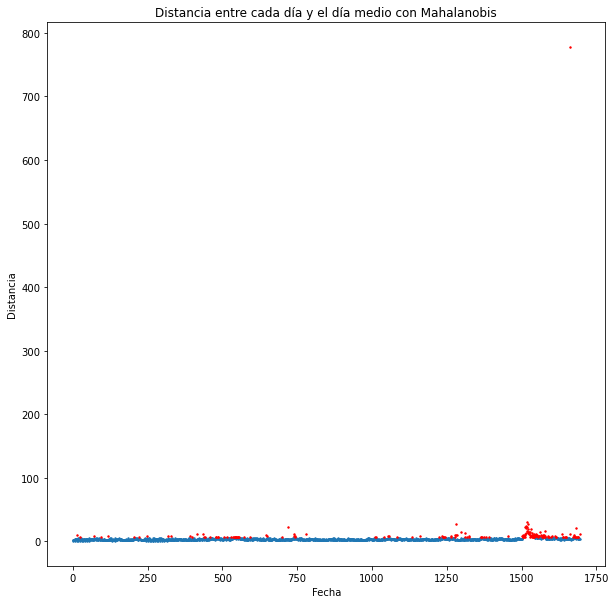

In [26]:
# Hallar las distancias de cada día al día medio con la distancia de Mahalanobis
distances_to_mean = find_outliers(df_returns)
# Hallar los outliers, siendo outliers los datos cuya distancia a la media está por encima de un percentil
plot_outliers(90, distances_to_mean, df_returns)

Los días más atípicos fueron: ['2014-01-24', '2014-02-03', '2014-04-10', '2014-10-09', '2014-10-21', '2014-12-17', '2014-12-18', '2015-06-29', '2015-07-27', '2015-08-20', '2015-08-24', '2015-08-27', '2015-09-01', '2015-09-28', '2015-10-05', '2015-10-22', '2015-12-11', '2016-01-06', '2016-01-07', '2016-01-13', '2016-01-15', '2016-01-22', '2016-01-25', '2016-01-26', '2016-01-29', '2016-02-02', '2016-02-05', '2016-02-08', '2016-02-12', '2016-02-16', '2016-03-01', '2016-03-08', '2016-06-24', '2016-06-27', '2016-09-09', '2016-11-07', '2016-11-09', '2016-11-10', '2018-02-02', '2018-02-05', '2018-02-08', '2018-03-22', '2018-03-26', '2018-04-02', '2018-04-06', '2018-10-10', '2018-10-11', '2018-10-16', '2018-10-24', '2018-10-25', '2018-10-30', '2018-11-01', '2018-11-07', '2018-11-28', '2018-12-04', '2018-12-07', '2018-12-17', '2018-12-24', '2018-12-26', '2019-01-31', '2019-02-28', '2019-04-04', '2019-04-24', '2019-05-13', '2019-05-14', '2019-06-03', '2019-06-04', '2019-08-01', '2019-08-05', '20

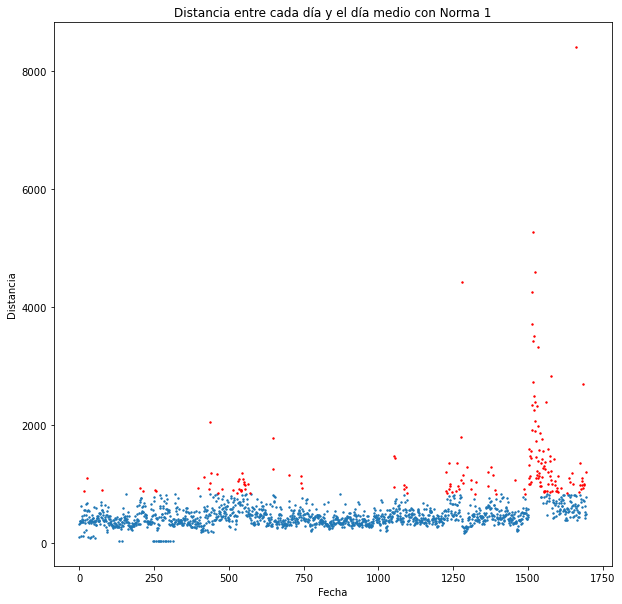

In [27]:
# Hallar las distancias de cada día al día medio con la distancia inducida por la norma-1
distances_to_mean = find_outliers(df_returns, distance=1)
# Hallar los outliers, siendo outliers los datos cuya distancia a la media está por encima de un percentil
plot_outliers(90, distances_to_mean, df_returns, 'Norma 1')

Los días más atípicos fueron: ['2014-01-22', '2014-02-03', '2014-04-03', '2014-05-08', '2014-06-09', '2014-10-10', '2014-11-03', '2014-12-09', '2015-03-04', '2015-03-19', '2015-06-18', '2015-07-01', '2015-07-27', '2015-08-24', '2015-08-27', '2015-09-01', '2015-09-28', '2015-10-22', '2015-10-23', '2015-11-02', '2015-11-03', '2015-11-30', '2015-12-14', '2016-01-07', '2016-01-13', '2016-01-22', '2016-01-25', '2016-01-28', '2016-01-29', '2016-02-02', '2016-02-05', '2016-02-08', '2016-02-10', '2016-02-12', '2016-03-08', '2016-04-08', '2016-06-24', '2016-06-27', '2016-09-09', '2016-10-06', '2016-11-04', '2016-11-07', '2016-11-09', '2016-11-10', '2017-01-04', '2017-12-01', '2017-12-07', '2018-01-16', '2018-02-05', '2018-02-08', '2018-03-19', '2018-06-04', '2018-07-11', '2018-10-10', '2018-10-24', '2018-10-25', '2018-10-30', '2018-11-01', '2018-11-07', '2018-12-04', '2018-12-07', '2018-12-24', '2018-12-26', '2019-01-31', '2019-02-28', '2019-04-04', '2019-04-24', '2019-05-13', '2019-05-14', '20

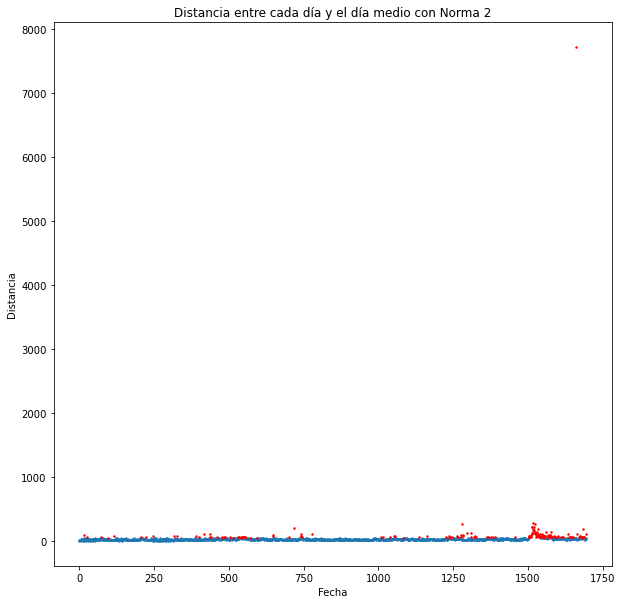

In [28]:
# Hallar las distancias de cada día al día medio con la distancia inducida por la norma-2
distances_to_mean = find_outliers(df_returns, distance=2)
# Hallar los outliers, siendo outliers los datos cuya distancia a la media está por encima de un percentil
plot_outliers(90, distances_to_mean, df_returns, 'Norma 2')

Los días más atípicos fueron: ['2014-01-16', '2014-01-22', '2014-01-30', '2014-03-10', '2014-04-01', '2014-04-03', '2014-04-15', '2014-05-08', '2014-06-09', '2014-06-18', '2014-06-24', '2014-07-01', '2014-07-10', '2014-07-28', '2014-08-29', '2014-09-11', '2014-10-10', '2014-11-03', '2014-12-09', '2014-12-18', '2015-01-30', '2015-03-04', '2015-03-19', '2015-04-09', '2015-05-20', '2015-05-27', '2015-06-12', '2015-06-15', '2015-06-18', '2015-06-22', '2015-07-01', '2015-07-27', '2015-08-27', '2015-10-02', '2015-10-16', '2015-10-23', '2015-10-30', '2015-11-02', '2015-11-03', '2015-11-30', '2015-12-14', '2015-12-24', '2016-01-14', '2016-01-22', '2016-01-25', '2016-01-28', '2016-02-02', '2016-02-08', '2016-02-10', '2016-03-15', '2016-04-08', '2016-04-12', '2016-05-06', '2016-05-25', '2016-06-27', '2016-09-02', '2016-09-28', '2016-10-06', '2016-10-28', '2016-11-01', '2016-11-04', '2016-11-07', '2016-11-10', '2016-11-11', '2016-11-30', '2016-12-08', '2017-01-04', '2017-01-19', '2017-01-30', '20

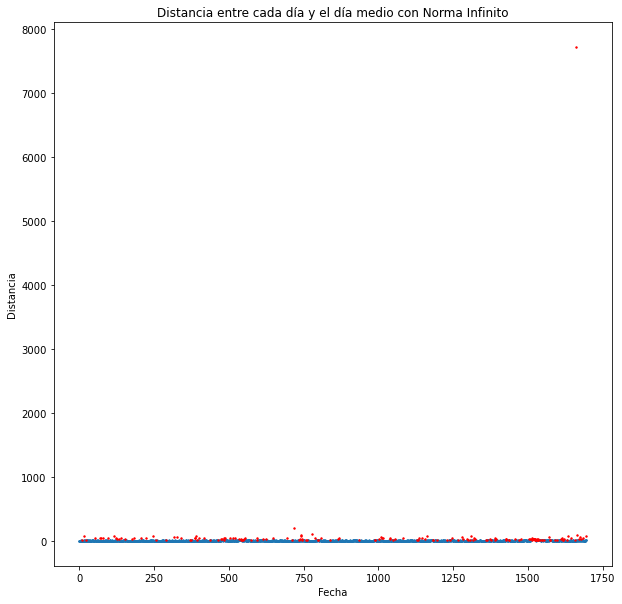

In [29]:
# Hallar las distancias de cada día al día medio con la distancia inducida por la norma-infinito
distances_to_mean = find_outliers(df_returns, distance=np.inf)
# Hallar los outliers, siendo outliers los datos cuya distancia a la media está por encima de un percentil
plot_outliers(90, distances_to_mean, df_returns, 'Norma Infinito')

In [30]:
extreme_outlier_index = np.argmax([np.linalg.norm(df_returns.mean()-df_returns.iloc[i], ord=2) for i in range(df_returns.shape[0])])

In [31]:
extreme_outlier_stock = df_returns.iloc[extreme_outlier_index].idxmax()
df_returns.iloc[extreme_outlier_index]

A          0.231058
AA         4.088307
AAN        1.082910
AAP        0.618583
AAPL      -0.086934
           ...     
XYL        1.906491
YNDX    7727.416174
YUM        1.656458
ZION       0.062228
ZTS        2.045156
Name: 2020-10-08, Length: 399, dtype: float64

Como se puede ver aquí, YNDX presenta problemas, entonces en el próximo filtrado de datos se eliminará. A continuación, se pueden ver los datos de outliers sacando YNDX

Los días más atípicos fueron: ['2014-01-22', '2014-03-10', '2014-04-01', '2014-04-03', '2014-06-09', '2014-06-18', '2014-07-01', '2014-07-10', '2014-09-11', '2014-10-10', '2014-11-03', '2014-11-28', '2014-12-01', '2014-12-09', '2015-03-04', '2015-03-19', '2015-04-09', '2015-06-12', '2015-06-15', '2015-06-18', '2015-07-01', '2015-07-17', '2015-07-27', '2015-08-24', '2015-08-26', '2015-10-07', '2015-10-12', '2015-10-22', '2015-10-23', '2015-10-28', '2015-11-02', '2015-11-03', '2015-11-30', '2015-12-14', '2015-12-24', '2016-01-19', '2016-01-25', '2016-01-28', '2016-02-04', '2016-02-05', '2016-02-08', '2016-02-10', '2016-06-27', '2016-07-05', '2016-09-02', '2016-10-06', '2016-10-28', '2016-11-01', '2016-11-04', '2016-11-07', '2016-11-09', '2016-11-10', '2017-01-04', '2017-01-19', '2017-02-14', '2017-05-15', '2017-07-27', '2017-10-27', '2017-11-02', '2017-12-01', '2018-01-16', '2018-03-19', '2018-05-02', '2018-05-03', '2018-06-04', '2018-07-11', '2018-07-25', '2018-10-24', '2018-10-25', '20

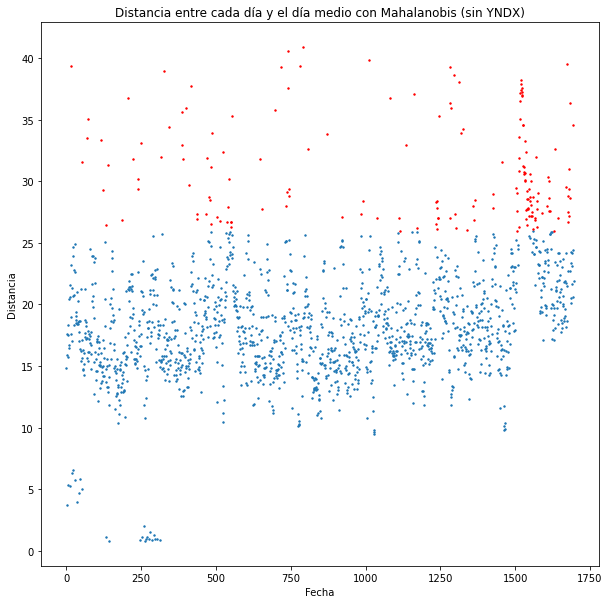

In [32]:
# Hallar las distancias de cada día al día medio con la distancia de Mahalanobis
distances_to_mean = find_outliers(df_returns.drop(extreme_outlier_stock, axis=1),
                                  cov=cov_matrix.drop(extreme_outlier_stock, axis=1).drop(extreme_outlier_stock))
# Hallar los outliers, siendo outliers los datos cuya distancia a la media está por encima de un percentil
plot_outliers(90, distances_to_mean, df_returns.drop(extreme_outlier_stock, axis=1), 'Mahalanobis (sin YNDX)')

Los días más atípicos fueron: ['2014-01-24', '2014-02-03', '2014-04-10', '2014-10-09', '2014-10-21', '2014-12-17', '2014-12-18', '2015-06-29', '2015-07-27', '2015-08-20', '2015-08-24', '2015-08-26', '2015-08-27', '2015-09-01', '2015-09-28', '2015-10-05', '2015-10-22', '2015-12-11', '2016-01-06', '2016-01-07', '2016-01-13', '2016-01-15', '2016-01-22', '2016-01-25', '2016-01-26', '2016-01-29', '2016-02-02', '2016-02-05', '2016-02-08', '2016-02-12', '2016-02-16', '2016-02-17', '2016-03-01', '2016-03-08', '2016-06-24', '2016-06-27', '2016-09-09', '2016-11-07', '2016-11-09', '2016-11-10', '2018-02-02', '2018-02-05', '2018-02-08', '2018-03-22', '2018-03-26', '2018-04-02', '2018-04-06', '2018-10-10', '2018-10-11', '2018-10-16', '2018-10-24', '2018-10-25', '2018-10-30', '2018-11-01', '2018-11-07', '2018-11-28', '2018-12-04', '2018-12-07', '2018-12-17', '2018-12-24', '2018-12-26', '2019-01-31', '2019-02-28', '2019-04-04', '2019-04-24', '2019-05-13', '2019-05-14', '2019-06-03', '2019-06-04', '20

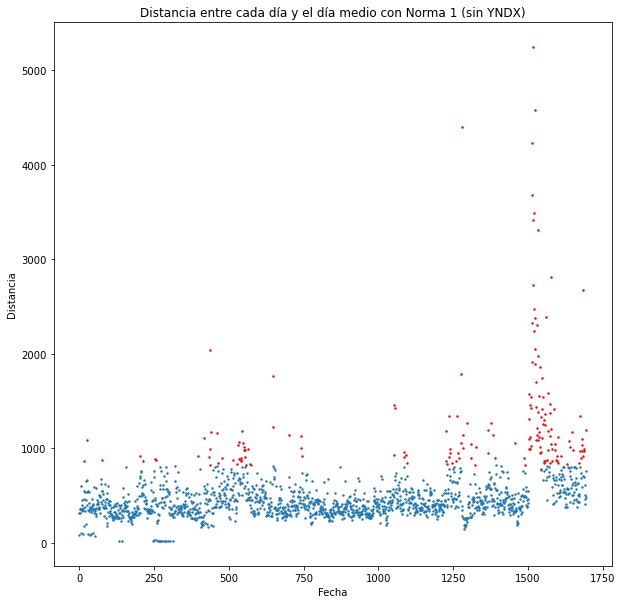

In [33]:
# Hallar las distancias de cada día al día medio con la distancia inducida por la norma-1
distances_to_mean = find_outliers(df_returns.drop(extreme_outlier_stock, axis=1),
                                  cov=cov_matrix.drop(extreme_outlier_stock, axis=1).drop(extreme_outlier_stock),
                                  distance=1)
# Hallar los outliers, siendo outliers los datos cuya distancia a la media está por encima de un percentil
plot_outliers(90, distances_to_mean, df_returns, 'Norma 1 (sin YNDX)')

Los días más atípicos fueron: ['2014-01-22', '2014-02-03', '2014-04-03', '2014-05-08', '2014-06-09', '2014-10-10', '2014-11-03', '2014-12-09', '2015-03-04', '2015-03-19', '2015-06-18', '2015-07-01', '2015-07-27', '2015-08-24', '2015-08-27', '2015-09-01', '2015-09-28', '2015-10-22', '2015-10-23', '2015-11-02', '2015-11-03', '2015-11-30', '2015-12-14', '2016-01-07', '2016-01-13', '2016-01-22', '2016-01-25', '2016-01-28', '2016-01-29', '2016-02-02', '2016-02-05', '2016-02-08', '2016-02-10', '2016-02-12', '2016-03-08', '2016-04-08', '2016-06-24', '2016-06-27', '2016-09-09', '2016-10-06', '2016-11-04', '2016-11-07', '2016-11-09', '2016-11-10', '2017-01-04', '2017-12-01', '2017-12-07', '2018-01-16', '2018-02-05', '2018-02-08', '2018-03-19', '2018-06-04', '2018-07-11', '2018-10-10', '2018-10-24', '2018-10-25', '2018-10-30', '2018-11-01', '2018-11-07', '2018-12-04', '2018-12-07', '2018-12-24', '2018-12-26', '2019-01-31', '2019-02-28', '2019-04-04', '2019-04-24', '2019-05-13', '2019-05-14', '20

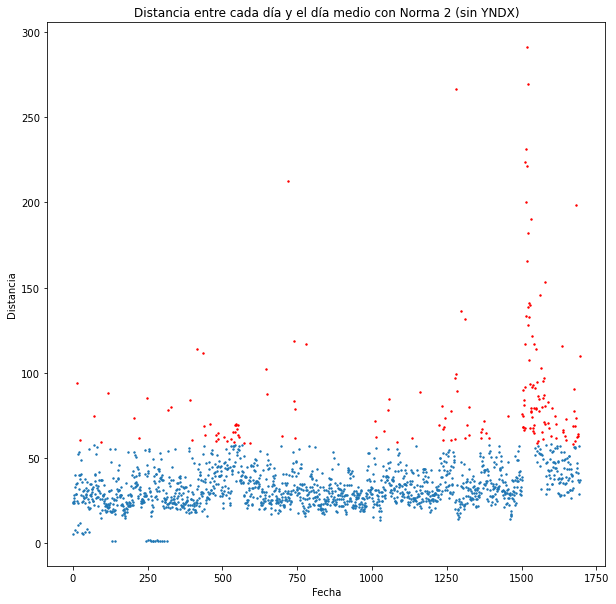

In [34]:
# Hallar las distancias de cada día al día medio con la distancia inducida por la norma-2
distances_to_mean = find_outliers(df_returns.drop(extreme_outlier_stock, axis=1),
                                  cov=cov_matrix.drop(extreme_outlier_stock, axis=1).drop(extreme_outlier_stock),
                                  distance=2)
# Hallar los outliers, siendo outliers los datos cuya distancia a la media está por encima de un percentil
plot_outliers(90, distances_to_mean, df_returns, 'Norma 2 (sin YNDX)')

Los días más atípicos fueron: ['2014-01-16', '2014-01-22', '2014-01-30', '2014-02-06', '2014-03-10', '2014-04-01', '2014-04-03', '2014-04-15', '2014-05-08', '2014-06-09', '2014-06-18', '2014-06-24', '2014-07-01', '2014-07-10', '2014-07-28', '2014-08-29', '2014-09-11', '2014-10-10', '2014-11-03', '2014-12-09', '2014-12-18', '2015-01-30', '2015-03-04', '2015-03-19', '2015-04-09', '2015-05-20', '2015-05-27', '2015-06-12', '2015-06-15', '2015-06-18', '2015-06-22', '2015-07-01', '2015-07-27', '2015-08-27', '2015-10-02', '2015-10-16', '2015-10-23', '2015-10-30', '2015-11-02', '2015-11-03', '2015-11-30', '2015-12-14', '2015-12-24', '2016-01-14', '2016-01-22', '2016-01-25', '2016-01-28', '2016-02-02', '2016-02-08', '2016-02-10', '2016-03-15', '2016-04-08', '2016-04-12', '2016-05-06', '2016-05-25', '2016-06-27', '2016-09-02', '2016-09-28', '2016-10-06', '2016-10-28', '2016-11-01', '2016-11-04', '2016-11-07', '2016-11-10', '2016-11-11', '2016-11-30', '2016-12-08', '2017-01-04', '2017-01-19', '20

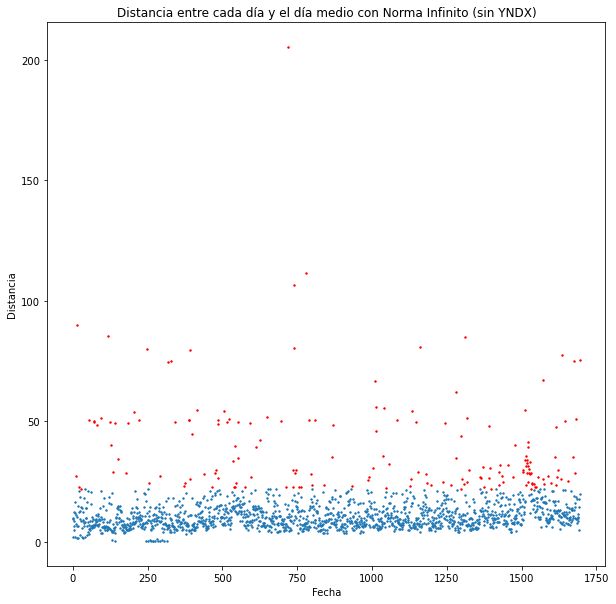

In [35]:
# Hallar las distancias de cada día al día medio con la distancia inducida por la norma-infinito
distances_to_mean = find_outliers(df_returns.drop(extreme_outlier_stock, axis=1),
                                  cov=cov_matrix.drop(extreme_outlier_stock, axis=1).drop(extreme_outlier_stock),
                                  distance=np.inf)
# Hallar los outliers, siendo outliers los datos cuya distancia a la media está por encima de un percentil
plot_outliers(90, distances_to_mean, df_returns, 'Norma Infinito (sin YNDX)')

# Conclusiones del análisis

* Activos a eliminar:
    - VTI: es un índice compuesto por muchas acciones
    - SPY: es un ETF que sigue al S&P500, entonces contiene muchas de las acciones que ya están por otro lado
    - DIA: es un ETF que sigue al índice Dow Jones, entonces contiene muchas de las acciones que ya están por otro lado
    - IWN: es un ETF que sigue al índice Russel 2000 Value, entonces contiene muchas de las acciones que ya están por otro lado
    - IJH: es un ETF que sigue al índice S&P MidCap 400, entonces contiene muchas de las acciones que ya están por otro lado
    - IWF: es un ETF que sigue al índice Russel 1000 Growth, entonces contiene muchas de las acciones que ya están por otro lado
    - GOOG: es la acción de Google clase C (la clase A, GOOGL, también está, pero no se eliminará)
    - YNDX: tiene un valor muy atípico que debe ser un error

In [39]:
# Activos a eliminar
to_remove = ['VTI', 'SPY', 'DIA', 'IWN', 'IJH', 'IWF', 'GOOG', 'YNDX']
# Eliminar las acciones definidas anteriormente y crear una nueva matriz de precios y de retornos y matrices de covarianza
df_prices_filtered = df_prices.drop(to_remove, axis=1)
df_returns_filtered = df_returns.drop(to_remove, axis=1)

df_prices_filtered.to_parquet(f'{S3_REFINED_URI}matriz_precios_filtrada.parquet')
df_returns_filtered.to_parquet(f'{S3_REFINED_URI}matriz_retornos_filtrada.parquet')

In [37]:
# Calcular la matriz de varianzas y covarianzas de Ledoit & Wolf
cov_matrix_filtered = np.cov(df_returns_filtered.T)

# Guardar la matriz de varianzas y covarianzas de Ledoit & Wolf en S3
cov_matrix_filtered = pd.DataFrame(cov_matrix_filtered,
                                   index = df_returns_filtered.columns, columns = df_returns_filtered.columns)
cov_matrix_filtered.to_parquet(f'{S3_REFINED_URI}cov_retornos_filtrada.parquet')

In [38]:
# Calcular la matriz de varianzas y covarianzas de Ledoit & Wolf
cov_matrix_lw_filtered = ledoit_wolf(df_returns_filtered)[0]

# Guardar la matriz de varianzas y covarianzas de Ledoit & Wolf en S3
cov_matrix_lw_filtered = pd.DataFrame(cov_matrix_lw_filtered,
                                      index = df_returns_filtered.columns, columns = df_returns_filtered.columns)
cov_matrix_lw_filtered.to_parquet(f'{S3_REFINED_URI}cov_retornos_lw_filtrada.parquet')